In [6]:
# 1. Load the dataset in the file named BDOShoham.csv
# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('C:/Users/kseht/Desktop/Summer courses/Intro to ML/Home Work 1/BDOShoham.csv') # default is header=infer, change if column names are not in first row
print('done \n')



Loading data from file ...
done 



In [8]:
#produce at least one table and one graph that summarize the dataset statistics
# Let's look at a numerical summary table

print('Summary of the dataset - in table')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset - in table


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,4.055273e-17,2.361736e-18,0.0,4.108187e-14,5.690394e-15,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


Summary of dataset - Univariate graphs

Histograms:


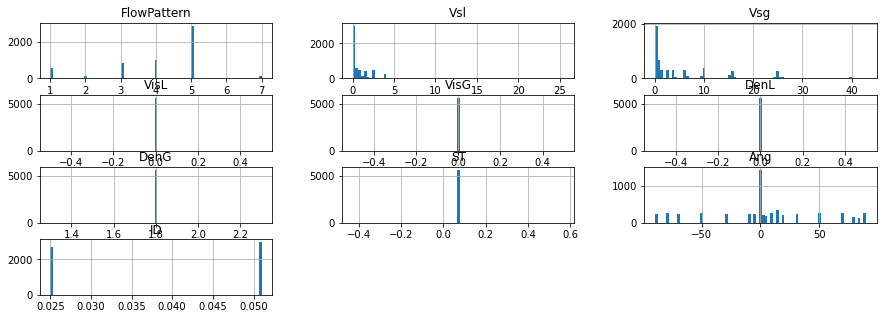

In [13]:
%matplotlib inline
import matplotlib.pyplot as pl  # https://matplotlib.org/

print('Summary of dataset - Univariate graphs')
print()

print('Histograms:')
dataset.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()

In [15]:
# 2. predicting the FlowPattern value based on the values of the variables named Vsl, Vsg, and Ang.
print('Reading list of problem variables X and Y...')
X_name = [ 'Vsl', 'Vsg', 'Ang' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'FlowPattern'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [16]:
# Split data into training and testing datasets
from sklearn import model_selection

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

done with setting aside data for testing


In [17]:
# algorithms

from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

print('training model...')
modelName = LogisticRegression(solver='liblinear')
modelName.fit(X_train, y_train)  # train the model on the training data
print('done with training the model')
# Let's compute its accuracy on the data we set aside.
from sklearn.metrics import accuracy_score

print('computing accuracy...')
y_predicted = modelName.predict(X_test)  # make predictions using the validation data 
print('Accuracy:', accuracy_score(y_test, y_predicted))

training model...
done with training the model
computing accuracy...
Accuracy: 0.6581497797356828


In [20]:
modelName = KNeighborsClassifier()
modelName.fit(X_train, y_train)  # train the model on the training data
print('done with training the model')
# Let's compute its accuracy on the data we set aside.
from sklearn.metrics import accuracy_score

print('computing accuracy...')
y_predicted = modelName.predict(X_test)  # make predictions using the validation data 
print('Accuracy:', accuracy_score(y_test, y_predicted))

done with training the model
computing accuracy...
Accuracy: 0.8405286343612335


C:\Users\kseht\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS FOR LR
Accuracy: 0.652863436123348


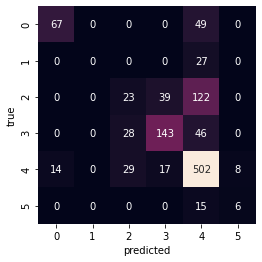

C:\Users\kseht\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 clasification report:
               precision    recall  f1-score   support

           1       0.83      0.58      0.68       116
           2       0.00      0.00      0.00        27
           3       0.29      0.12      0.17       184
           4       0.72      0.66      0.69       217
           5       0.66      0.88      0.75       570
           7       0.43      0.29      0.34        21

    accuracy                           0.65      1135
   macro avg       0.49      0.42      0.44      1135
weighted avg       0.61      0.65      0.61      1135

Cohen Kappa Score: 0.43167925252458506


RESULTS FOR KNN-distance
Accuracy: 0.8546255506607929


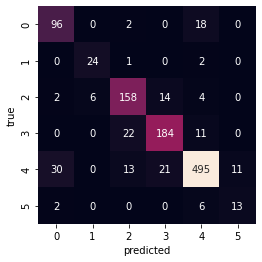


 clasification report:
               precision    recall  f1-score   support

           1       0.74      0.83      0.78       116
           2       0.80      0.89      0.84        27
           3       0.81      0.86      0.83       184
           4       0.84      0.85      0.84       217
           5       0.92      0.87      0.90       570
           7       0.54      0.62      0.58        21

    accuracy                           0.85      1135
   macro avg       0.77      0.82      0.80      1135
weighted avg       0.86      0.85      0.86      1135

Cohen Kappa Score: 0.7878442185779473


RESULTS FOR KNN-uniform
Accuracy: 0.8405286343612335


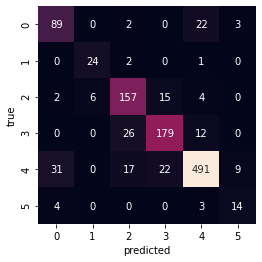


 clasification report:
               precision    recall  f1-score   support

           1       0.71      0.77      0.74       116
           2       0.80      0.89      0.84        27
           3       0.77      0.85      0.81       184
           4       0.83      0.82      0.83       217
           5       0.92      0.86      0.89       570
           7       0.54      0.67      0.60        21

    accuracy                           0.84      1135
   macro avg       0.76      0.81      0.78      1135
weighted avg       0.85      0.84      0.84      1135

Cohen Kappa Score: 0.7676166667609314




In [22]:
# 3. Model’s performance using cross-validation on the training set you created; report on at least two different scoring methods

# Now it is time to train some models on the data and estimate their accuracy on unseen data.

import seaborn as sns   # https://seaborn.pydata.org/

# Algorithms

models = []
models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('KNN-distance', KNeighborsClassifier(n_neighbors=5, weights='distance'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    pl.xlabel('predicted')
    pl.ylabel('true');
    pl.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n')  

RESULTS FOR LR
Accuracy: 0.6625550660792952


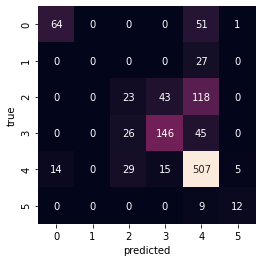


 clasification report:
               precision    recall  f1-score   support

           1       0.82      0.55      0.66       116
           2       0.00      0.00      0.00        27
           3       0.29      0.12      0.18       184
           4       0.72      0.67      0.69       217
           5       0.67      0.89      0.76       570
           7       0.67      0.57      0.62        21

    accuracy                           0.66      1135
   macro avg       0.53      0.47      0.48      1135
weighted avg       0.62      0.66      0.62      1135

Cohen Kappa Score: 0.44882583629288597


RESULTS FOR KNN-distance
Accuracy: 0.8105726872246696


C:\Users\kseht\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


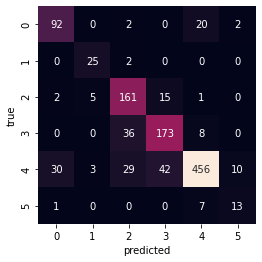


 clasification report:
               precision    recall  f1-score   support

           1       0.74      0.79      0.76       116
           2       0.76      0.93      0.83        27
           3       0.70      0.88      0.78       184
           4       0.75      0.80      0.77       217
           5       0.93      0.80      0.86       570
           7       0.52      0.62      0.57        21

    accuracy                           0.81      1135
   macro avg       0.73      0.80      0.76      1135
weighted avg       0.83      0.81      0.81      1135

Cohen Kappa Score: 0.7287523106490492




In [36]:
# 4. Modify at least two hyperparameters (e.g., n_neighbors, weights, metric, penalty)
# and describe the improvement/degradation of a model’s performance compared 
# to its default settings

models = []
models.append(('LR', LogisticRegression(penalty='l2',solver='newton-cg'))) # default=’lbfgs’
models.append(('KNN-distance', KNeighborsClassifier(n_neighbors=10, weights='uniform'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    pl.xlabel('predicted')
    pl.ylabel('true');
    pl.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n')  
    



In [28]:
# Performance Comparison to its defalut settings
'''
In the case of Logistics Regression
RESULTS FOR LR with the defualt hyper parameters
Accuracy: 0.652863436123348
    accuracy                           0.65      1135
   macro avg       0.49      0.42      0.44      1135
weighted avg       0.61      0.65      0.61      1135

Cohen Kappa Score: 0.43167925252458506

RESULTS FOR LR with the modified hyper parameters
Accuracy: 0.6625550660792952
    accuracy                           0.66      1135
   macro avg       0.53      0.47      0.48      1135
weighted avg       0.62      0.66      0.62      1135

Cohen Kappa Score: 0.44882583629288597


In the case of KNN
RESULTS FOR KNN-distance with default hyper parameters
Accuracy: 0.8546255506607929
    accuracy                           0.84      1135
   macro avg       0.76      0.81      0.78      1135
weighted avg       0.85      0.84      0.84      1135

Cohen Kappa Score: 0.7676166667609314

RESULTS FOR KNN-distance with the modified hyper parameters
This shows that there is a degradation in the model accuracey 
Accuracy: 0.8105726872246696
accuracy                           0.81      1135
   macro avg       0.73      0.80      0.76      1135
weighted avg       0.83      0.81      0.81      1135

Cohen Kappa Score: 0.7287523106490492
'''

'For the default settings\nRESULTS FOR KNN-distance\nAccuracy: 0.8105726872246696\n\nFor the modified hyperparameters\n'

In [ ]:
# 5. By looking at the maximum accuracy and the kappa score attend by the KNN model with the default parameters gives the best perfoemance
# where as Logistics Regression Model has the least accuraccy with the default hyper parameters.